In [0]:
#Importando a biblioteca pandas para carregar e visualizar a base de dados
import pandas as pd

In [0]:
passageiros = pd.read_csv('Passageiros.csv')

In [3]:
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [0]:
#Com as bibliotecas seaborn e matplotlib vamos conseguir gerar gráficos para visualizar a base de dados. 
import seaborn as sns
import matplotlib.pyplot as plt

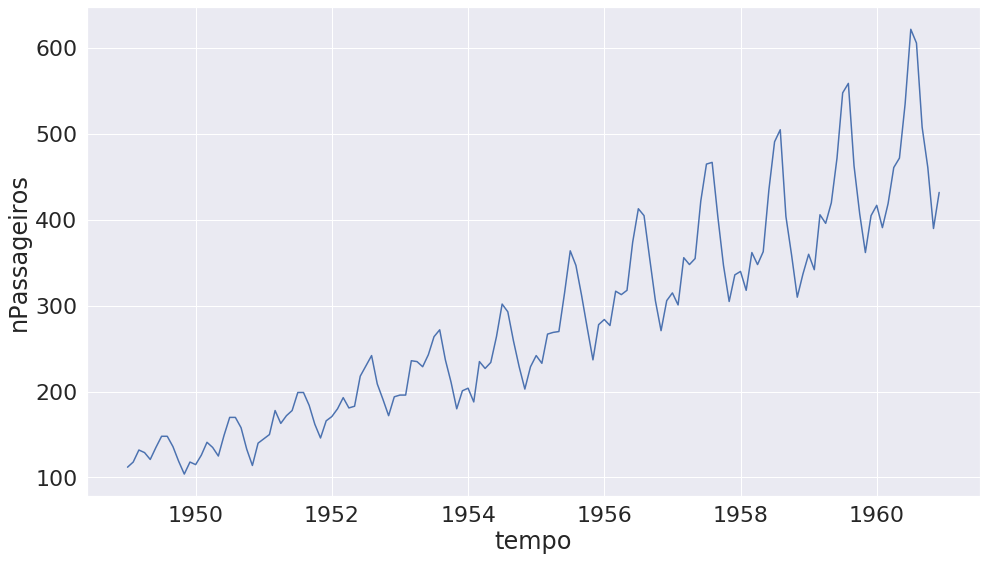

In [5]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="tempo", y="nPassageiros", data=passageiros)

In [0]:
#Seleciona todas as colunas menos a última
Tempo = passageiros.iloc[:,:-1].values

In [0]:
nPassageiros = passageiros.iloc[:,1].values

In [0]:
#Podemos separar parte dos dados para treino e teste
from sklearn.model_selection import train_test_split

In [0]:
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, 
                                                                                      test_size = 0.3)

In [0]:
from sklearn import linear_model

In [0]:
regressor = linear_model.LinearRegression()

In [12]:
#Ajustando a reta aos dados de treino
regressor.fit(Tempo_treino,nPassageiros_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
nPassageiros_predito = regressor.predict(Tempo_teste)

In [0]:
import numpy as np

In [0]:
#Colocando os dados em um data frame para posteriormente gerar uma figura com o 
# Seaborn
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_teste,
             })


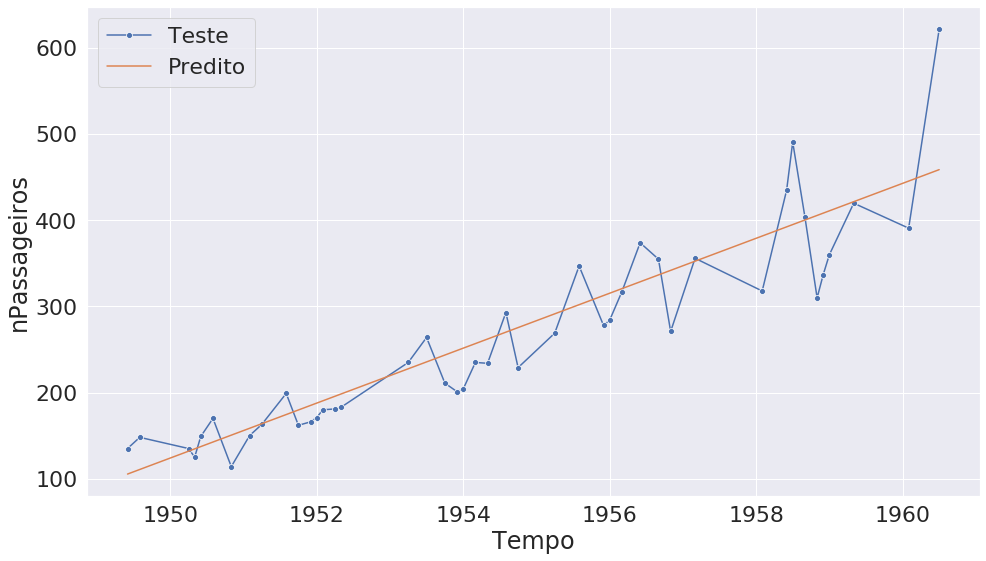

In [16]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )

## Medindo a qualidade da regressão

In [17]:
#Extraindo o coeficiente angular da reta ajustada
regressor.coef_

array([31.90617192])

In [18]:
#Extraindo o coeficiente linear da reta ajustada
regressor.intercept_

-62093.08319968173

In [0]:
from sklearn.metrics import r2_score

In [20]:
# r2_score para a reta ajustada
r2_score(nPassageiros_teste,nPassageiros_predito)

0.8283800116718698

## SVM

In [0]:
from sklearn.svm import SVR

In [22]:
# Ajusta o modelo de regressão com a máquina de vetor de suporte
regressor_svr = SVR( C=1000000)
regressor_svr.fit(Tempo_treino,nPassageiros_treino)

SVR(C=1000000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
nPassageiros_predito_svr = regressor_svr.predict(Tempo_teste)

In [0]:
passageiros_predito_svr = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito_svr,
             })

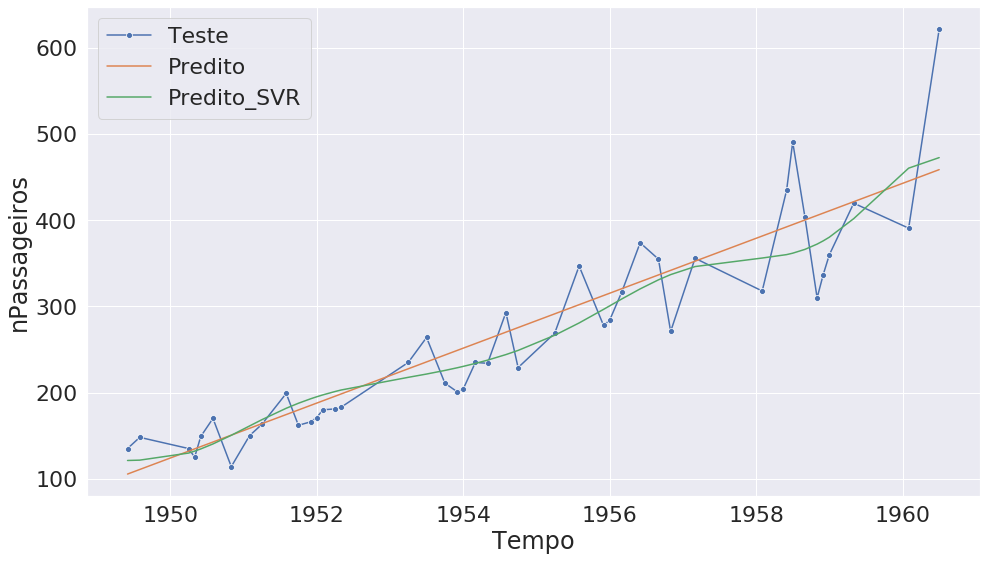

In [25]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito_svr, label = "Predito_SVR" )

In [26]:
# r2_score para a curva ajustada
r2_score(nPassageiros_teste,nPassageiros_predito_svr)

0.8398919420682205

# Classificação

## Árvores de decisão

In [0]:
#Carregando a nova base de dados
celular = pd.read_csv("Celular.csv",delimiter=",")

In [28]:
celular.head()

,salario,economias,idade,dividas,plano
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


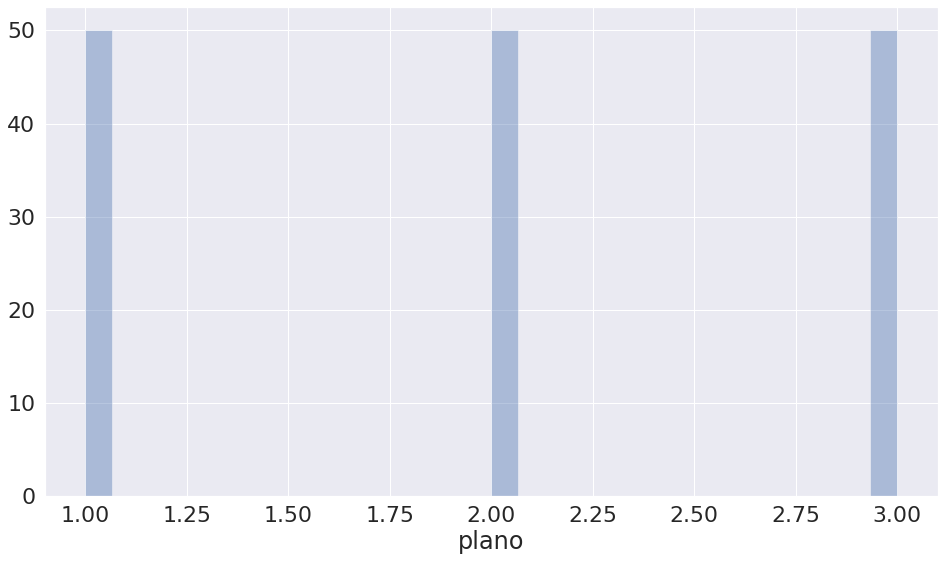

In [29]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.distplot(celular["plano"], bins=30, kde=False)

In [0]:
#Sperando os atributos
X = celular.iloc[:,:-1].values

In [0]:
#Separando o alvo
y = celular.iloc[:,4].values

In [0]:
#Separando a base de dados em base de treino e base de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [0]:
from sklearn import tree

In [34]:
#Ajustando o modelo
classificador_arvore = tree.DecisionTreeClassifier()
classificador_arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

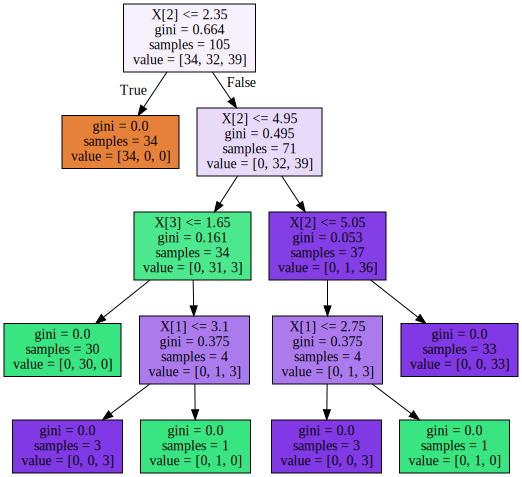

In [35]:
#Visualizando a árvore criada
import graphviz 
dot_data = tree.export_graphviz(classificador_arvore, filled=True, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [0]:
#Fazendo previsões a partir da base de testes
plano_previsto = classificador_arvore.predict(X_teste)

In [37]:
plano_previsto

array([3, 2, 1, 3, 1, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 2,
       1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 1, 3, 3, 2, 1, 3, 2, 2, 3, 1, 3, 1,
       1])

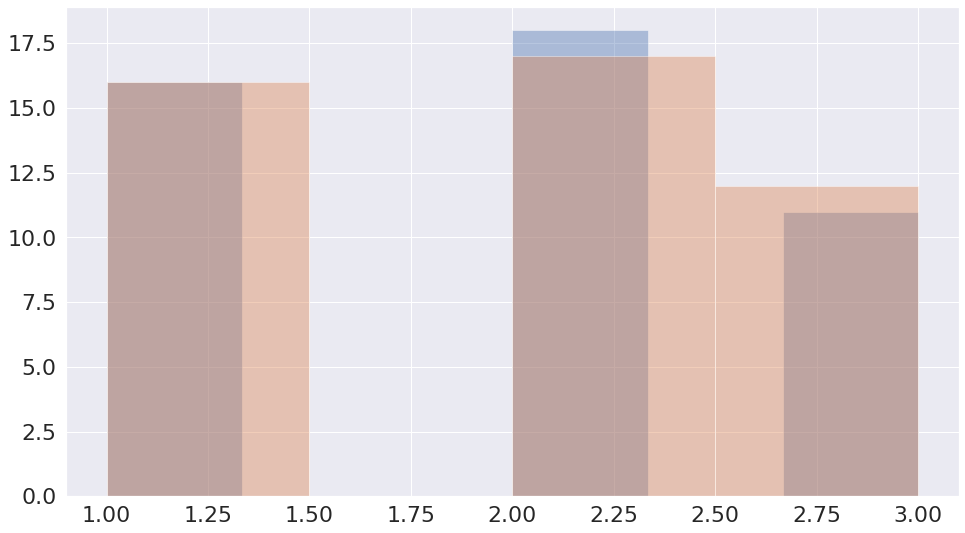

In [38]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.distplot(y_teste, bins=6, kde=False)
sns.distplot(plano_previsto, bins=4, kde=False)

In [0]:
from sklearn.metrics import accuracy_score

In [40]:
#Teste de acurácia
accuracy_score(y_teste, plano_previsto)*100

97.77777777777777

## K Vizinhos mais próximos

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
#Ajustando o modelo aos dados
classificador_vizinho = KNeighborsClassifier(5)
classificador_vizinho.fit(X_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
plano_previsto_v = classificador_vizinho.predict(X_teste)

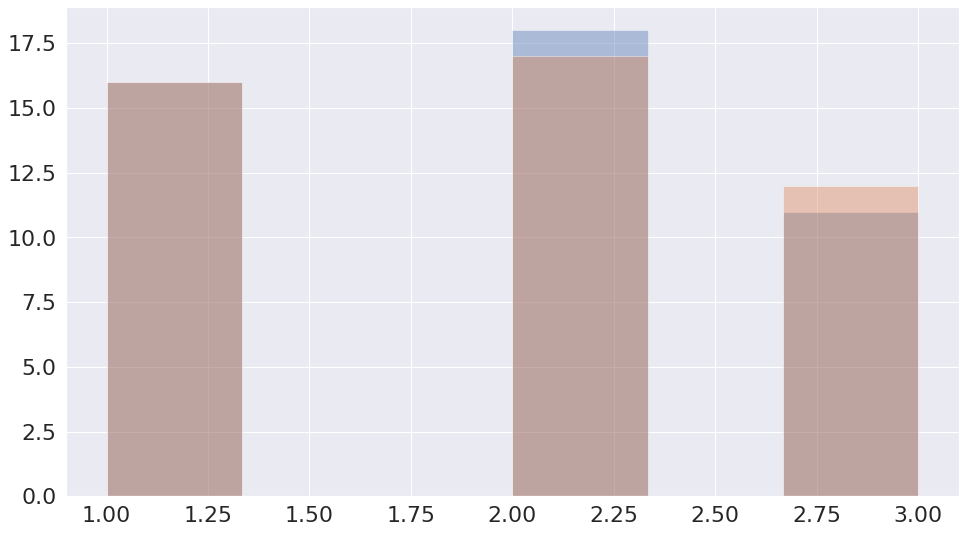

In [44]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.distplot(y_teste, bins=6, kde=False)
sns.distplot(plano_previsto_v, bins=6, kde=False)

## Medindo a acurácia

In [45]:
accuracy_score(y_teste, plano_previsto_v)*100

97.77777777777777

In [0]:
plano_previsto_v2 = classificador_vizinho.predict(X_treino)

In [47]:
accuracy_score(y_treino, plano_previsto_v2)*100

97.14285714285714

In [0]:
# Iniciando a estratificação cruzada
from sklearn.model_selection import RepeatedStratifiedKFold

In [0]:
skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
params = {'n_neighbors': [5]}

In [0]:
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid= params, cv=skfold, 
                  verbose=1, scoring='accuracy', return_train_score=True)

In [53]:
gs.fit(X,y)

Fitting 100 folds for each of 1 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None, param_grid={'n_neighbors': [5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [54]:
#Resultado da estratificação cruzada
gs.cv_results_['mean_test_score']

array([0.964])

# Agrupamento / Clustering

## KMeans

In [0]:
#Carregando a base de dados deste problema
engajamento = pd.read_csv('Engajamento.csv')

In [56]:
engajamento.head()

,Horas,Taxa de Cliques,Classe
0,1007.084589,1.582099,1
1,1005.886193,1.524809,1
2,1005.609471,0.846857,1
3,989.814354,2.841944,2
4,995.328807,3.569900,3


In [0]:
X = engajamento.iloc[:,:-1]

In [58]:
X.head()

,Horas,Taxa de Cliques
0,1007.084589,1.582099
1,1005.886193,1.524809
2,1005.609471,0.846857
3,989.814354,2.841944
4,995.328807,3.569900


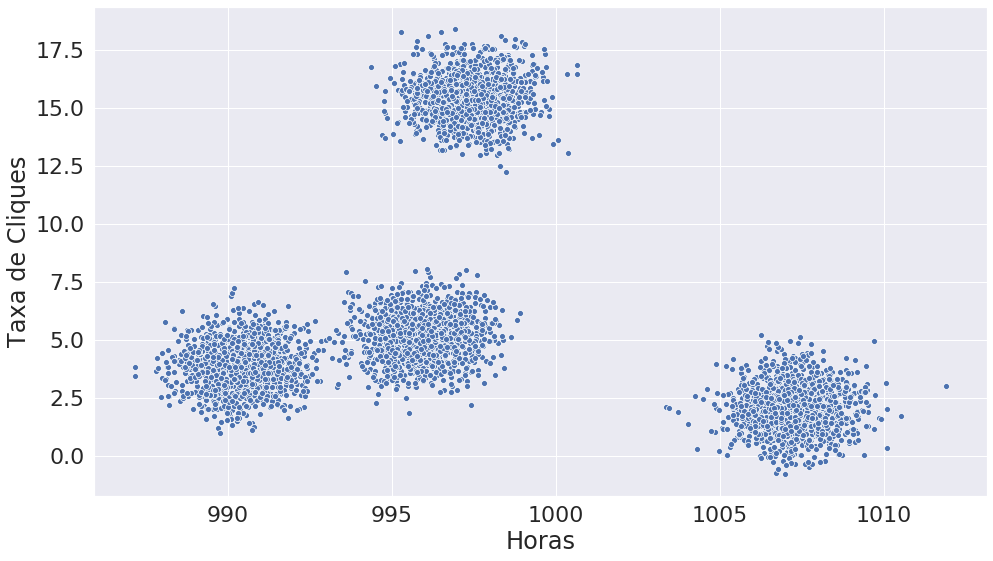

In [59]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.scatterplot(x='Horas',y='Taxa de Cliques',data=X)

In [0]:
from sklearn.cluster import KMeans

In [0]:
#KMeans com dois grupos apenas
kmeans = KMeans(n_clusters=2, random_state=0)

In [62]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [63]:
#resgatando o resultado do Kmeans
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

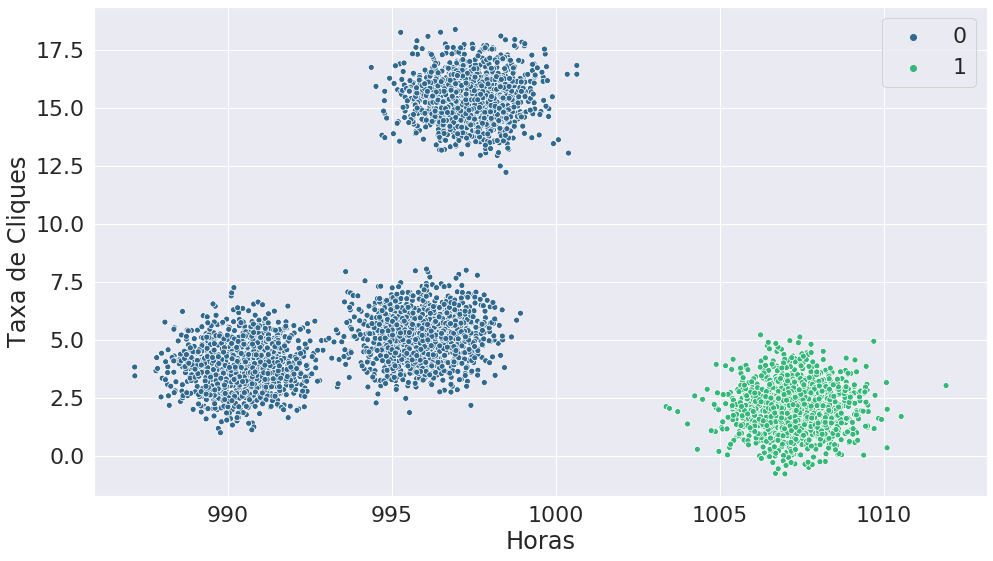

In [64]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.scatterplot(x='Horas',y='Taxa de Cliques',data=X, hue=kmeans.labels_, palette='viridis')

In [65]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

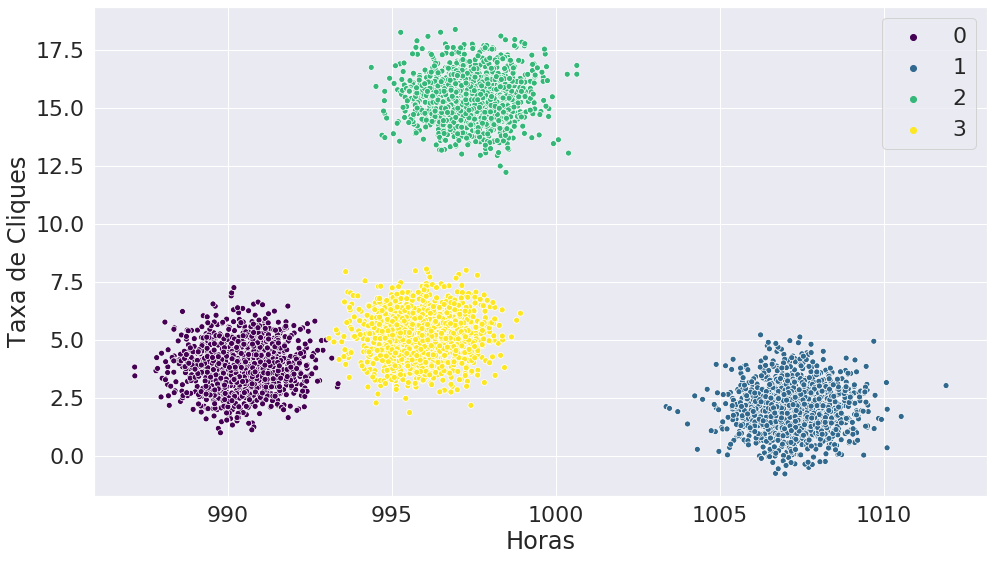

In [66]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.scatterplot(x='Horas',y='Taxa de Cliques',data=X, hue=kmeans.labels_, palette='viridis')

## Optics

In [0]:
from sklearn.cluster import OPTICS

In [0]:
#Ajustando o modelo com a função OPTICS
clustering_o = OPTICS(min_samples=800).fit(X)

In [69]:
clustering_o.labels_

array([0, 0, 0, ..., 1, 2, 1])

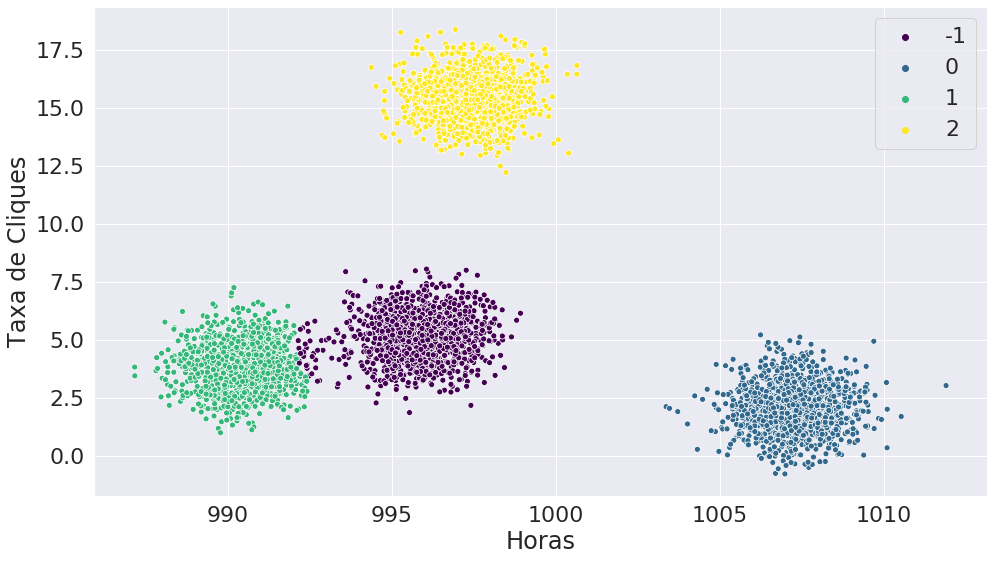

In [71]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.scatterplot(x='Horas',y='Taxa de Cliques',data=X, hue=clustering_o.labels_, palette='viridis')